# Correlation from temperature with other values

The following analytics should help to identify different correlations between temperature and sales values.

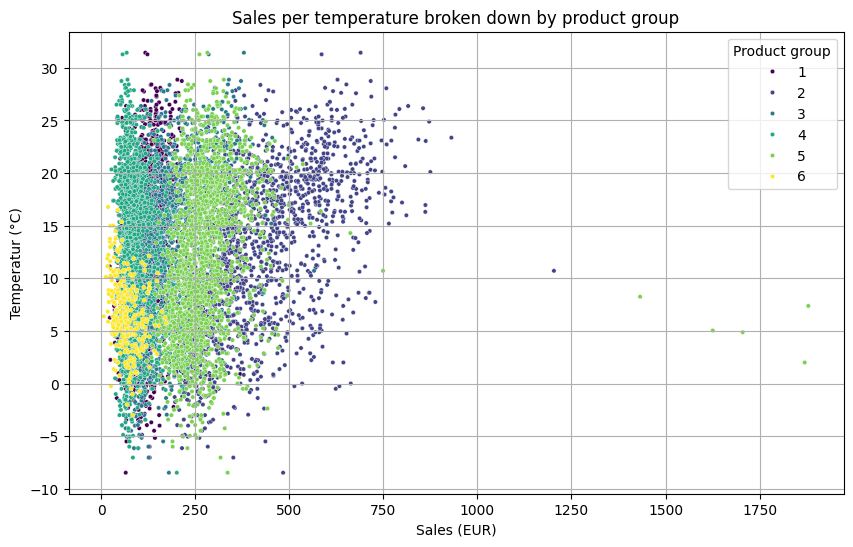

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
sales_data = pd.read_csv('../bakery_sales_data/umsatzdaten_gekuerzt.csv')
weather_data = pd.read_csv('../bakery_sales_data/wetter.csv')
kiwo_data = pd.read_csv('../bakery_sales_data/kiwo.csv')


# we need to convert date type here to be able to make date calculations
sales_data['Datum'] = pd.to_datetime(sales_data['Datum'])
weather_data['Datum'] = pd.to_datetime(weather_data['Datum'])
kiwo_data['Datum'] = pd.to_datetime(kiwo_data['Datum'])


# calculate and add average temperature per month
# extract month and year
weather_data['Jahr_Monat'] = weather_data['Datum'].dt.to_period('M')

# calulate mean temperature per month
monthly_mean_temp = weather_data.groupby('Jahr_Monat')['Temperatur'].transform('mean')

# add the mean temperature as extra colum
weather_data['Durchschnittstemperatur'] = monthly_mean_temp

weather_data['Temperature_Abweichung'] = weather_data['Temperatur'] - weather_data['Durchschnittstemperatur']

# create diagram
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=bakery_sales_prediction_data, x='Umsatz', y='Temperature_Abweichung',  hue='Warengruppe', palette='viridis', s=10)

#plt.title('Sales per temperature diff to avarage temp broken down by product group')
#plt.ylabel('Temperatur (°C)')
#plt.xlabel('Sales (EUR)')
#plt.legend(title='Product group')
#plt.grid(True)
#plt.show()

# merge the dataframes
bakery_sales_prediction_data = sales_data.merge(weather_data, on='Datum', how='left') \
    .merge(kiwo_data, on='Datum', how='left')

# Convert the 'Date' column to datetime format
bakery_sales_prediction_data['Datum'] = pd.to_datetime(bakery_sales_prediction_data['Datum'])

# Drop for now all rows that as NaN-Values in temperature colum 
bakery_sales_prediction_data = bakery_sales_prediction_data.dropna(subset=['Temperatur'])

# create diagram
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bakery_sales_prediction_data, x='Umsatz', y='Temperatur',  hue='Warengruppe', palette='viridis', s=10)

plt.title('Sales per temperature broken down by product group')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Sales (EUR)')
plt.legend(title='Product group')
plt.grid(True)
plt.show()

Findings:
- There are some outliers in some of the sales values, that makes it hard to see a coorelation.
- Productgroup 6 will mainly sold between -5 to 15 degree
- Productgroup 1 has the biggest destibution in sales value

Idea based on that 
- cluster the temperature values in 5 degrees groups

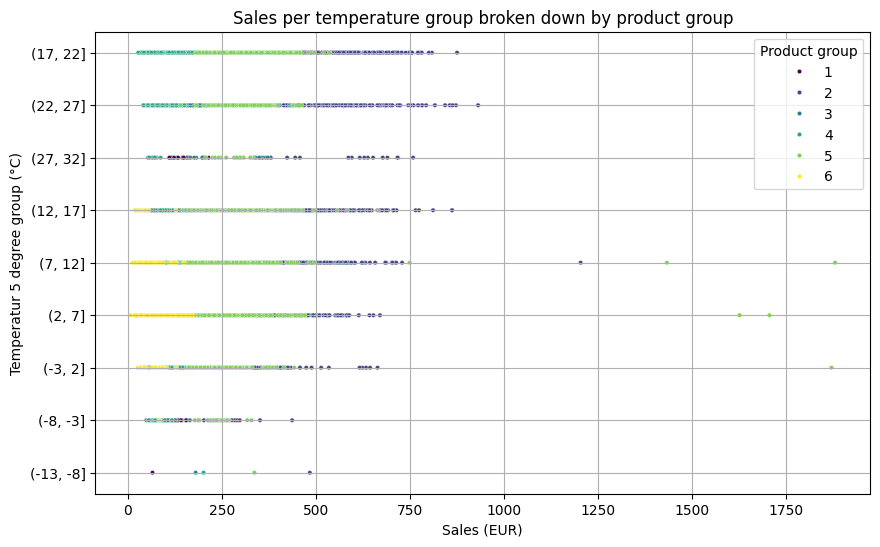

In [3]:
# Divide the temperature into groups 5 degrees separated
bakery_sales_prediction_data['Temperatur_Gruppe'] = pd.cut(bakery_sales_prediction_data['Temperatur'], \
                                                           bins=range(int(bakery_sales_prediction_data['Temperatur'].min() - 5), \
                                                                      int(bakery_sales_prediction_data['Temperatur'].max() + 10), 5))

# convert groups to string categories
bakery_sales_prediction_data['Temperatur_Gruppe'] = bakery_sales_prediction_data['Temperatur_Gruppe'].astype(str)

bakery_sales_prediction_data.head(10)

# create diagram with temperature groups
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bakery_sales_prediction_data, x='Umsatz', y='Temperatur_Gruppe',  hue='Warengruppe', palette='viridis', s=10)

plt.title('Sales per temperature group broken down by product group')
plt.ylabel('Temperatur 5 degree group (°C)')
plt.xlabel('Sales (EUR)')
plt.legend(title='Product group')
plt.grid(True)
plt.show()



Findings:
- Very few values in group (-13,-8]
- wides destribution in group (22,27]

Ideas based on that
- Create average temperature for every month and compare relation of absolute temperatue to avarage

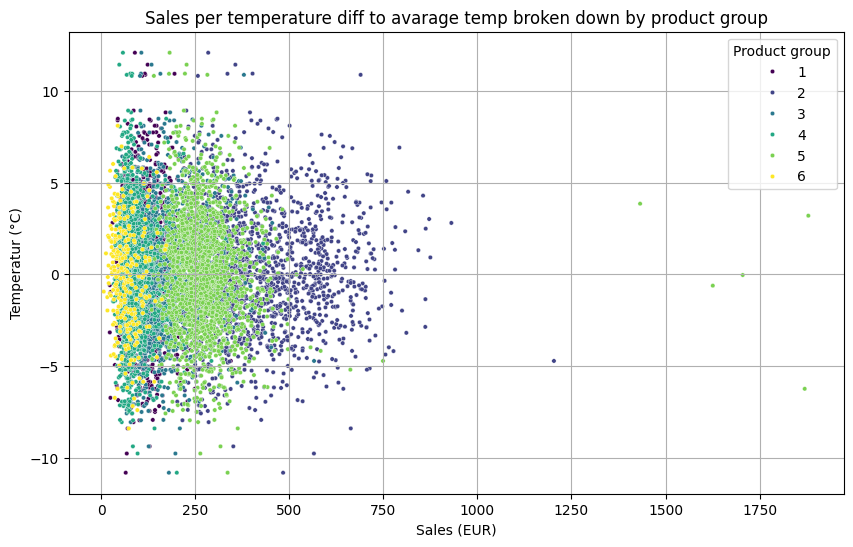

In [18]:
# extract month and year
bakery_sales_prediction_data['Jahr_Monat'] = bakery_sales_prediction_data['Datum'].dt.to_period('M')

# calulate mean temperature per month
monthly_mean_temp = bakery_sales_prediction_data.groupby('Jahr_Monat')['Temperatur'].transform('mean')

# add the mean temperature as extra colum
bakery_sales_prediction_data['Durchschnittstemperatur'] = monthly_mean_temp

bakery_sales_prediction_data['Temperature_Abweichung'] = bakery_sales_prediction_data['Temperatur'] - bakery_sales_prediction_data['Durchschnittstemperatur']

# create diagram
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bakery_sales_prediction_data, x='Umsatz', y='Temperature_Abweichung',  hue='Warengruppe', palette='viridis', s=10)

plt.title('Sales per temperature diff to avarage temp broken down by product group')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Sales (EUR)')
plt.legend(title='Product group')
plt.grid(True)
plt.show()